In [ ]:
# 라이브러리 불러오기
import pandas as pd
import numpy as np
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns

## 다항회귀분석 - 릿지 L2

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.loc[:, ['cylinders', 'horsepower', 'weight']]
y = df['mpg']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (392, 3)
y 데이터:  (392,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                      test_size = 0.3,
                                                                      random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (274, 3)
test 데이터:  (118, 3)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# 다항식
poly = PolynomialFeatures(degree = 5, include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("X_train 데이터: ", X_train.shape)
print("X_train_poly 데이터: ", X_train_poly.shape)

X_train 데이터:  (274, 3)
X_train_poly 데이터:  (274, 55)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
X_train_scale = standard.fit_transform(X_train_poly)
X_test_scale = standard.transform(X_test_poly)

In [ ]:
# 릿지
from sklearn.linear_model import Ridge
ridge = Ridge()
# 모델 훈련
ridge.fit(X_train_scale, y_train)

Ridge()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(ridge.score(X_train_scale, y_train))
print(ridge.score(X_test_scale, y_test))

0.7763873563181758
0.6833550248045738


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = ridge.intercept_;intercept

23.637591240875913

In [ ]:
# 기울기
slope = [round(x, 4) for x in ridge.coef_];print(slope)

[-0.8878, -6.3843, -2.4368, -1.7734, 0.2135, -1.0436, -0.5709, -1.853, -1.3697, -1.2949, 0.4679, -0.6121, 1.4977, 0.5964, -0.4372, 1.2961, 0.5156, -0.3162, -0.5862, -0.0917, -0.0063, 0.3247, 0.4584, 0.6282, 0.3052, 0.8148, 0.8857, 0.6101, 0.0612, 0.9118, 0.7835, 0.4265, 0.0482, -0.2111, 1.3761, -0.3652, 1.5854, -1.0306, 0.3635, 1.3276, -1.0485, -0.1373, 0.5472, 0.8109, -0.691, -0.2341, 0.1137, 0.3221, 0.2377, -0.1092, -0.0873, -0.1611, -0.1944, -0.1821, -0.2269]


In [ ]:
len(slope)

55

In [ ]:
X_poly_columns = poly.get_feature_names_out()

In [ ]:
for name, coef in zip(X_poly_columns, slope):
  print("{}: {}".format(name, coef))

cylinders: -0.8878
horsepower: -6.3843
weight: -2.4368
cylinders^2: -1.7734
cylinders horsepower: 0.2135
cylinders weight: -1.0436
horsepower^2: -0.5709
horsepower weight: -1.853
weight^2: -1.3697
cylinders^3: -1.2949
cylinders^2 horsepower: 0.4679
cylinders^2 weight: -0.6121
cylinders horsepower^2: 1.4977
cylinders horsepower weight: 0.5964
cylinders weight^2: -0.4372
horsepower^3: 1.2961
horsepower^2 weight: 0.5156
horsepower weight^2: -0.3162
weight^3: -0.5862
cylinders^4: -0.0917
cylinders^3 horsepower: -0.0063
cylinders^3 weight: 0.3247
cylinders^2 horsepower^2: 0.4584
cylinders^2 horsepower weight: 0.6282
cylinders^2 weight^2: 0.3052
cylinders horsepower^3: 0.8148
cylinders horsepower^2 weight: 0.8857
cylinders horsepower weight^2: 0.6101
cylinders weight^3: 0.0612
horsepower^4: 0.9118
horsepower^3 weight: 0.7835
horsepower^2 weight^2: 0.4265
horsepower weight^3: 0.0482
weight^4: -0.2111
cylinders^5: 1.3761
cylinders^4 horsepower: -0.3652
cylinders^4 weight: 1.5854
cylinders^3 ho

In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X_poly_columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = 23.637591240875913 + -0.8878 * cylinders + -6.3843 * horsepower + -2.4368 * weight + -1.7734 * cylinders^2 + 0.2135 * cylinders horsepower + -1.0436 * cylinders weight + -0.5709 * horsepower^2 + -1.853 * horsepower weight + -1.3697 * weight^2 + -1.2949 * cylinders^3 + 0.4679 * cylinders^2 horsepower + -0.6121 * cylinders^2 weight + 1.4977 * cylinders horsepower^2 + 0.5964 * cylinders horsepower weight + -0.4372 * cylinders weight^2 + 1.2961 * horsepower^3 + 0.5156 * horsepower^2 weight + -0.3162 * horsepower weight^2 + -0.5862 * weight^3 + -0.0917 * cylinders^4 + -0.0063 * cylinders^3 horsepower + 0.3247 * cylinders^3 weight + 0.4584 * cylinders^2 horsepower^2 + 0.6282 * cylinders^2 horsepower weight + 0.3052 * cylinders^2 weight^2 + 0.8148 * cylinders horsepower^3 + 0.8857 * cylinders horsepower^2 weight + 0.6101 * cylinders horsepower weight^2 + 0.0612 * cylinders weight^3 + 0.9118 * horsepower^4 + 0.7835 * horsepower^3 weight + 0.4265 * horsepower^2 weight^2 + 0.0482 * horse

In [ ]:
y_train_pred = ridge.predict(X_train_scale)
y_test_pred = ridge.predict(X_test_scale)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print("train RMSE: ", train_rmse)
print("test RMSE: ", test_rmse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("train MAE: ", train_mae)
print("test MAE: ", test_mae)

train RMSE:  3.7837474384323713
test RMSE:  4.092926644427514
train MAE:  2.747583776577178
test MAE:  3.0593186509931694


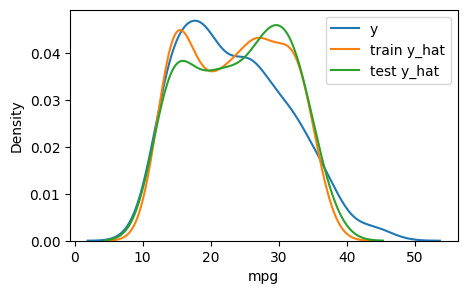

In [ ]:
# 실제값과 예측값 비교
plt.figure(figsize = (5, 3))
ax1 = sns.kdeplot(y, label = "y")
ax2 = sns.kdeplot(y_train_pred, label = "train y_hat", ax = ax1)
ax3 = sns.kdeplot(y_test_pred, label = "test y_hat", ax = ax1)
plt.legend()
plt.show()

In [ ]:
# 규제조절 - 결정계수
train_score = []
test_score = []
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_train_scale, y_train)
  train_score.append(ridge.score(X_train_scale, y_train))
  test_score.append(ridge.score(X_test_scale, y_test))

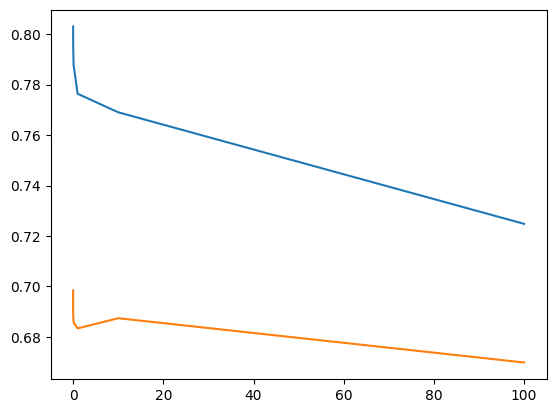

In [ ]:
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.show()

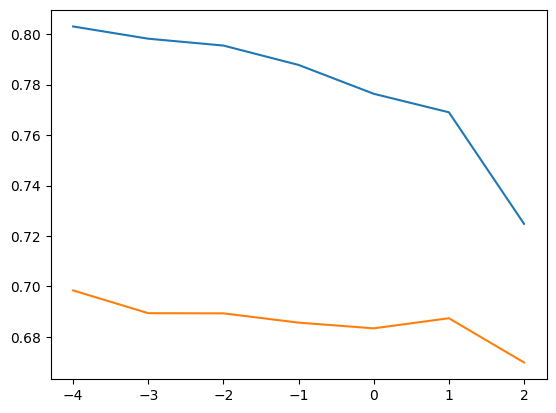

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [ ]:
score_df = pd.DataFrame({'alpha': alpha_list,
                         'train_score': train_score,
                         'test_score': test_score})
score_df

,alpha,train_score,test_score
0,0.0001,0.803084,0.698386
1,0.0010,0.798235,0.689357
2,0.0100,0.795516,0.689294
3,0.1000,0.787826,0.685612
4,1.0000,0.776387,0.683355
5,10.0000,0.769046,0.687365
6,100.0000,0.724801,0.669810


In [ ]:
score_df['diff'] = score_df['train_score'] - score_df['test_score']

In [ ]:
score_df

,alpha,train_score,test_score,diff
0,0.0001,0.803084,0.698386,0.104698
1,0.0010,0.798235,0.689357,0.108878
2,0.0100,0.795516,0.689294,0.106221
3,0.1000,0.787826,0.685612,0.102214
4,1.0000,0.776387,0.683355,0.093032
5,10.0000,0.769046,0.687365,0.081680
6,100.0000,0.724801,0.669810,0.054991


In [ ]:
# 규제조절 - RMSE
train_score = []
test_score = []
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge = Ridge(alpha = alpha)
  ridge.fit(X_train_scale, y_train)
  y_train_pred = ridge.predict(X_train_scale)
  y_test_pred = ridge.predict(X_test_scale)
  train_score.append(mean_squared_error(y_train, y_train_pred, squared = False))
  test_score.append(mean_squared_error(y_test, y_test_pred, squared = False))

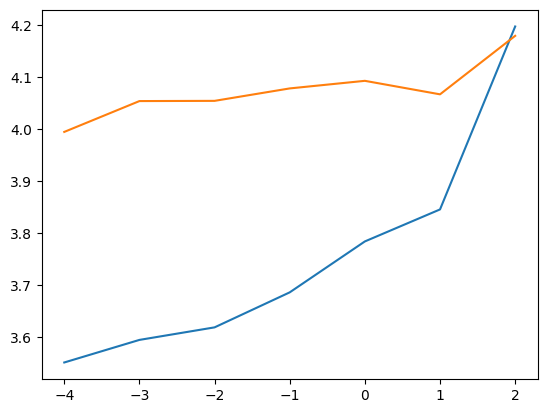

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [ ]:
score_df = pd.DataFrame({'alpha': alpha_list,
                         'train_score': train_score,
                         'test_score': test_score})
score_df

,alpha,train_score,test_score
0,0.0001,3.550700,3.994600
1,0.0010,3.594157,4.053950
2,0.0100,3.618296,4.054359
3,0.1000,3.685698,4.078312
4,1.0000,3.783747,4.092927
5,10.0000,3.845360,4.066927
6,100.0000,4.197565,4.179552


In [ ]:
score_df['diff'] = score_df['train_score'] - score_df['test_score']

In [ ]:
score_df

,alpha,train_score,test_score,diff
0,0.0001,3.550700,3.994600,-0.443900
1,0.0010,3.594157,4.053950,-0.459793
2,0.0100,3.618296,4.054359,-0.436063
3,0.1000,3.685698,4.078312,-0.392615
4,1.0000,3.783747,4.092927,-0.309179
5,10.0000,3.845360,4.066927,-0.221566
6,100.0000,4.197565,4.179552,0.018013


In [ ]:
# 최적의 알파로 최종 모델
ridge = Ridge(alpha=0.0001)
ridge.fit(X_train_scale, y_train)

print(ridge.score(X_train_scale, y_train))
print(ridge.score(X_test_scale, y_test))

y_train_pred = ridge.predict(X_train_scale)
y_test_pred = ridge.predict(X_test_scale)
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print("train RMSE: ", train_rmse)
print("test RMSE: ", test_rmse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("train MAE: ", train_mae)
print("test MAE: ", test_mae)

0.8030843894475233
0.6983861619807248
train RMSE:  3.5507004489726954
test RMSE:  3.99459995028362
train MAE:  2.5396359436875042
test MAE:  2.9704193363532414


## 다항회귀분석 - 라쏘 L1

In [ ]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [ ]:
# 전체 데이터
X = df.loc[:, ['cylinders', 'horsepower', 'weight']]
y = df['mpg']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (392, 3)
y 데이터:  (392,)


In [ ]:
# 데이터 분할 = 훈련 데이터 / 테스트 데이터 = 7:3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                                      test_size = 0.3,
                                                                      random_state = 42)
print("train 데이터: ", X_train.shape)
print("test 데이터: ", X_test.shape)

train 데이터:  (274, 3)
test 데이터:  (118, 3)


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
# 다항식
poly = PolynomialFeatures(degree = 5, include_bias = False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

print("X_train 데이터: ", X_train.shape)
print("X_train_poly 데이터: ", X_train_poly.shape)

X_train 데이터:  (274, 3)
X_train_poly 데이터:  (274, 55)


In [ ]:
# 표준화
from sklearn.preprocessing import StandardScaler
standard = StandardScaler()
X_train_scale = standard.fit_transform(X_train_poly)
X_test_scale = standard.transform(X_test_poly)

In [ ]:
# 라쏘
from sklearn.linear_model import Lasso
lasso = Lasso()
# 모델 훈련
lasso.fit(X_train_scale, y_train)

Lasso()

In [ ]:
# 모델 평가
# 적합도 측도 = 결정계수 = 설명력
print(lasso.score(X_train_scale, y_train))
print(lasso.score(X_test_scale, y_test))

0.7050729763665712
0.6759693341417214


In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept = lasso.intercept_;intercept

23.637591240875913

In [ ]:
# 기울기
slope = [round(x, 4) for x in lasso.coef_];print(slope)

[-0.4145, -1.6234, -3.9303, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]


In [ ]:
np.sum(lasso.coef_ == 0)
# 전체 55개 중에서 52개 사용하지 않음

52

In [ ]:
X_poly_columns = poly.get_feature_names_out()

In [ ]:
for name, coef in zip(X_poly_columns, slope):
  print("{}: {}".format(name, coef))

cylinders: -0.4145
horsepower: -1.6234
weight: -3.9303
cylinders^2: -0.0
cylinders horsepower: -0.0
cylinders weight: -0.0
horsepower^2: -0.0
horsepower weight: -0.0
weight^2: -0.0
cylinders^3: -0.0
cylinders^2 horsepower: -0.0
cylinders^2 weight: -0.0
cylinders horsepower^2: -0.0
cylinders horsepower weight: -0.0
cylinders weight^2: -0.0
horsepower^3: -0.0
horsepower^2 weight: -0.0
horsepower weight^2: -0.0
weight^3: -0.0
cylinders^4: -0.0
cylinders^3 horsepower: -0.0
cylinders^3 weight: -0.0
cylinders^2 horsepower^2: -0.0
cylinders^2 horsepower weight: -0.0
cylinders^2 weight^2: -0.0
cylinders horsepower^3: -0.0
cylinders horsepower^2 weight: -0.0
cylinders horsepower weight^2: -0.0
cylinders weight^3: -0.0
horsepower^4: -0.0
horsepower^3 weight: -0.0
horsepower^2 weight^2: -0.0
horsepower weight^3: -0.0
weight^4: -0.0
cylinders^5: -0.0
cylinders^4 horsepower: -0.0
cylinders^4 weight: -0.0
cylinders^3 horsepower^2: -0.0
cylinders^3 horsepower weight: -0.0
cylinders^3 weight^2: -0.0
c

In [ ]:
# 표본회귀식
equation = "y_hat = " + str(intercept)
for coef, name in zip(slope, X_poly_columns):
  equation += " + {} * {}".format(coef, name)
print(equation)

y_hat = 23.637591240875913 + -0.4145 * cylinders + -1.6234 * horsepower + -3.9303 * weight + -0.0 * cylinders^2 + -0.0 * cylinders horsepower + -0.0 * cylinders weight + -0.0 * horsepower^2 + -0.0 * horsepower weight + -0.0 * weight^2 + -0.0 * cylinders^3 + -0.0 * cylinders^2 horsepower + -0.0 * cylinders^2 weight + -0.0 * cylinders horsepower^2 + -0.0 * cylinders horsepower weight + -0.0 * cylinders weight^2 + -0.0 * horsepower^3 + -0.0 * horsepower^2 weight + -0.0 * horsepower weight^2 + -0.0 * weight^3 + -0.0 * cylinders^4 + -0.0 * cylinders^3 horsepower + -0.0 * cylinders^3 weight + -0.0 * cylinders^2 horsepower^2 + -0.0 * cylinders^2 horsepower weight + -0.0 * cylinders^2 weight^2 + -0.0 * cylinders horsepower^3 + -0.0 * cylinders horsepower^2 weight + -0.0 * cylinders horsepower weight^2 + -0.0 * cylinders weight^3 + -0.0 * horsepower^4 + -0.0 * horsepower^3 weight + -0.0 * horsepower^2 weight^2 + -0.0 * horsepower weight^3 + -0.0 * weight^4 + -0.0 * cylinders^5 + -0.0 * cylinder

In [ ]:
y_train_pred = lasso.predict(X_train_scale)
y_test_pred = lasso.predict(X_test_scale)

In [ ]:
# 예측 성능 평가
# RMSE, MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print("train RMSE: ", train_rmse)
print("test RMSE: ", test_rmse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("train MAE: ", train_mae)
print("test MAE: ", test_mae)

train RMSE:  4.345414867036591
test RMSE:  4.140384912549389
train MAE:  3.282194698008912
test MAE:  3.3131776458991924


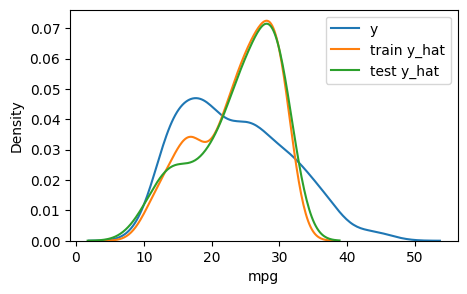

In [ ]:
# 실제값과 예측값 비교
plt.figure(figsize = (5, 3))
ax1 = sns.kdeplot(y, label = "y")
ax2 = sns.kdeplot(y_train_pred, label = "train y_hat", ax = ax1)
ax3 = sns.kdeplot(y_test_pred, label = "test y_hat", ax = ax1)
plt.legend()
plt.show()

In [ ]:
# 규제조절 - 결정계수
train_score = []
test_score = []
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(X_train_scale, y_train)
  train_score.append(lasso.score(X_train_scale, y_train))
  test_score.append(lasso.score(X_test_scale, y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.835e+03, tolerance: 1.754e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.373e+03, tolerance: 1.754e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.552e+01, tolerance: 1.754e

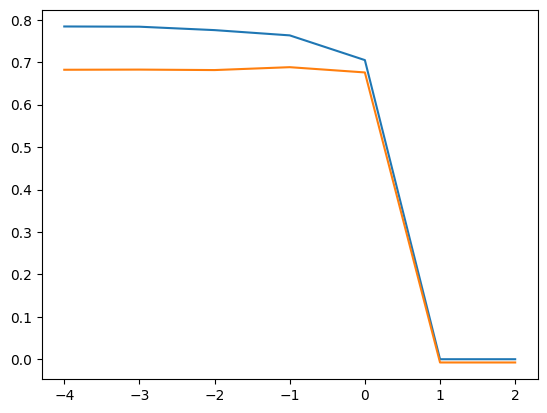

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [ ]:
score_df = pd.DataFrame({'alpha': alpha_list,
                         'train_score': train_score,
                         'test_score': test_score})
score_df

,alpha,train_score,test_score
0,0.0001,0.784311,0.682303
1,0.0010,0.783782,0.682673
2,0.0100,0.775729,0.681570
3,0.1000,0.763339,0.688366
4,1.0000,0.705073,0.675969
5,10.0000,0.000000,-0.007664
6,100.0000,0.000000,-0.007664


In [ ]:
score_df['diff'] = score_df['train_score'] - score_df['test_score']

In [ ]:
score_df

,alpha,train_score,test_score,diff
0,0.0001,0.784311,0.682303,0.102008
1,0.0010,0.783782,0.682673,0.101109
2,0.0100,0.775729,0.681570,0.094160
3,0.1000,0.763339,0.688366,0.074973
4,1.0000,0.705073,0.675969,0.029104
5,10.0000,0.000000,-0.007664,0.007664
6,100.0000,0.000000,-0.007664,0.007664


In [ ]:
# 규제조절 - RMSE
train_score = []
test_score = []
alpha_list = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  lasso = Lasso(alpha = alpha)
  lasso.fit(X_train_scale, y_train)
  y_train_pred = lasso.predict(X_train_scale)
  y_test_pred = lasso.predict(X_test_scale)
  train_score.append(mean_squared_error(y_train, y_train_pred, squared = False))
  test_score.append(mean_squared_error(y_test, y_test_pred, squared = False))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.835e+03, tolerance: 1.754e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.373e+03, tolerance: 1.754e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.552e+01, tolerance: 1.754e

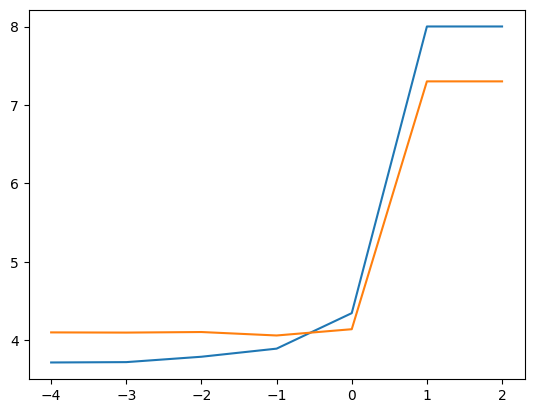

In [ ]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [ ]:
score_df = pd.DataFrame({'alpha': alpha_list,
                         'train_score': train_score,
                         'test_score': test_score})
score_df

,alpha,train_score,test_score
0,0.0001,3.716107,4.099719
1,0.0010,3.720659,4.097333
2,0.0100,3.789309,4.104448
3,0.1000,3.892579,4.060410
4,1.0000,4.345415,4.140385
5,10.0000,8.001547,7.301388
6,100.0000,8.001547,7.301388


In [ ]:
score_df['diff'] = score_df['train_score'] - score_df['test_score']

In [ ]:
score_df

,alpha,train_score,test_score,diff
0,0.0001,3.716107,4.099719,-0.383612
1,0.0010,3.720659,4.097333,-0.376674
2,0.0100,3.789309,4.104448,-0.315139
3,0.1000,3.892579,4.060410,-0.167831
4,1.0000,4.345415,4.140385,0.205030
5,10.0000,8.001547,7.301388,0.700159
6,100.0000,8.001547,7.301388,0.700159


In [ ]:
# 최적의 알파로 최종 모델
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_scale, y_train)

print(lasso.score(X_train_scale, y_train))
print(lasso.score(X_test_scale, y_test))

y_train_pred = lasso.predict(X_train_scale)
y_test_pred = lasso.predict(X_test_scale)
train_rmse = mean_squared_error(y_train, y_train_pred, squared = False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print("train RMSE: ", train_rmse)
print("test RMSE: ", test_rmse)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
print("train MAE: ", train_mae)
print("test MAE: ", test_mae)

0.7837819978500905
0.6826728458109975
train RMSE:  3.7206591576040955
test RMSE:  4.09733316685455
train MAE:  2.6996128919067024
test MAE:  3.0372597376527417


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.373e+03, tolerance: 1.754e+00
  model = cd_fast.enet_coordinate_descent(


# 분류 분석

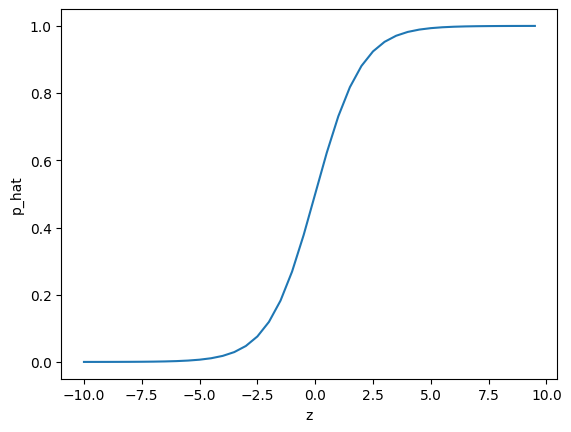

In [ ]:
z = np.arange(-10, 10, 0.5) # x축의 z값을 0.1의 간격으로 표시
p_hat = 1 / (1 + np.exp(-z)) # np.exp 로 지수 함수 계산

plt.plot(z, p_hat)
plt.xlabel('z')
plt.ylabel('p_hat')
plt.show()

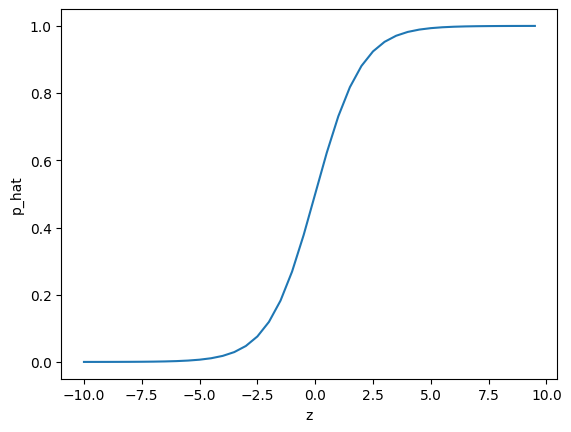

In [ ]:
z = np.arange(-10, 10, 0.5) # x축의 z값을 0.1의 간격으로 표시
p_hat = np.exp(z) / (1 + np.exp(z)) # np.exp 로 지수 함수 계산

plt.plot(z, p_hat)
plt.xlabel('z')
plt.ylabel('p_hat')
plt.show()

## 퀴즈

In [ ]:
TP = 64; FN = 18; FP = 104; TN = 128
# 정확도 = 정분류율
acc = (TP + TN) / (TP + FN + FP + TN)
print("정확도 = 정분류율", acc)
# 오분류율
print("오분류율", 1 - acc)
# 정밀도
# 예측한 것들 중에서 얼마나 잘 맞췄는가 = 모델 정확도
prec = TP / (TP + FP)
print("정밀도", prec)
# 재현율 = 민감도 = 소수집단 정분류율
# 실제 참인 것들 중에서 얼마나 잘 예측(재현)하였는가
reca = TP / (TP + FN)
print("재현율", reca)
# 소수집단 오분류율
print("소수집단 오분류율", 1 - reca)
# 특이도
spec = TN / (FP + TN)
print("특이도", spec)
# f1 점수
f1s = 2 * prec * reca / (prec + reca)
print("f1 점수", f1s)

정확도 = 정분류율 0.6114649681528662
오분류율 0.3885350318471338
정밀도 0.38095238095238093
재현율 0.7804878048780488
소수집단 오분류율 0.2195121951219512
특이도 0.5517241379310345
f1 점수 0.512


## 로지스틱 회귀 분석 - 전체데이터

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/lsda02/data/mortgage.xlsx', engine = 'openpyxl')
df.head()
# 담보대출승인여부, 착수금비율, 소득대출비율

,y,x1,x2
0,1,16.35,49.94
1,1,34.43,56.16
2,1,39.19,36.89
3,1,23.58,56.88
4,0,29.92,27.05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       30 non-null     int64  
 1   x1      30 non-null     float64
 2   x2      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
df['y'].unique()

array([1, 0])

In [ ]:
df['y'].value_counts()

y
1    17
0    13
Name: count, dtype: int64

In [ ]:
df.columns

Index(['y', 'x1', 'x2'], dtype='object')

In [ ]:
# 전체 데이터
X = df.loc[:,['x1', 'x2']]
y = df['y']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (30, 2)
y 데이터:  (30,)


In [ ]:
# 로지스틱회귀모델
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression();m1.fit(X, y)

LogisticRegression()

In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept1 = round(m1.intercept_[0], 5);intercept1

-9.31469

In [ ]:
# 기울기
slope1 = [round(x, 5) for x in m1.coef_[0]];print(slope1)

[0.13407, 0.17728]


In [ ]:
for name, coef in zip(X.columns, slope1):
  print("{}: {}".format(name, coef))

x1: 0.13407
x2: 0.17728


In [ ]:
# 표본회귀식
equation1 = "y_hat = " + str(intercept1)
for coef, name in zip(slope1, X.columns):
  equation1 += " + {} * {}".format(coef, name)
print(equation1)

y_hat = -9.31469 + 0.13407 * x1 + 0.17728 * x2


In [ ]:
# 예측
y_pred1 = m1.predict(X)
y_pred1[:5]

array([1, 1, 1, 1, 0])

In [ ]:
y_pred1_proba = m1.predict_proba(X)
y_pred1_proba[:5]

array([[0.1505, 0.8495],
       [0.0052, 0.9948],
       [0.0773, 0.9227],
       [0.0193, 0.9807],
       [0.6243, 0.3757]])

In [ ]:
m1.classes_

array([0, 1])

In [ ]:
zv = m1.decision_function(X)

In [ ]:
zv[:5]

array([ 1.7306,  5.2573,  2.4794,  3.9302, -0.5079])

In [ ]:
X.head()

,x1,x2
0,16.35,49.94
1,34.43,56.16
2,39.19,36.89
3,23.58,56.88
4,29.92,27.05


In [ ]:
x1 = X['x1'][0];x2 = X['x2'][0]
-9.31469 + 0.13407 * x1 + 0.17728 * x2

1.7307176999999978

In [ ]:
print(y_pred1_proba[:5])
from scipy.special import expit
expit(zv)

[[0.1505 0.8495]
 [0.0052 0.9948]
 [0.0773 0.9227]
 [0.0193 0.9807]
 [0.6243 0.3757]]


array([0.8495, 0.9948, 0.9227, 0.9807, 0.3757, 0.8743, 0.9861, 0.8911,
       0.6339, 0.7016, 0.5346, 0.0837, 0.0631, 0.2251, 0.9123, 0.4579,
       0.9671, 0.8868, 0.9868, 0.227 , 0.029 , 0.066 , 0.9842, 0.1305,
       0.6644, 0.1657, 0.1506, 0.2535, 0.898 , 0.1034])

In [ ]:
# 성능 평가 - 정확도
print(m1.score(X, y))
print(np.mean(y == y_pred1))

0.8666666666666667
0.8666666666666667


In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
logit_cm = confusion_matrix(y, y_pred1)
print(logit_cm)

[[11  2]
 [ 2 15]]


In [ ]:
from sklearn.metrics import classification_report
logit_rpt = classification_report(y, y_pred1)
print(logit_rpt)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.88      0.88      0.88        17

    accuracy                           0.87        30
   macro avg       0.86      0.86      0.86        30
weighted avg       0.87      0.87      0.87        30



In [ ]:
(0.85 + 0.88) / 2

0.865

In [ ]:
(0.85 * 13 + 0.88 * 17) / 30

0.8669999999999999

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acc = accuracy_score(y, y_pred1);print(acc)
pre = precision_score(y, y_pred1);print(pre)
rec = recall_score(y, y_pred1);print(rec)
f1 = f1_score(y, y_pred1);print(f1)

0.8666666666666667
0.8823529411764706
0.8823529411764706
0.8823529411764706


위 0번이 양성클래스

[[11  2]

 [ 2 15]]

In [ ]:
# TP FN
# FP TN

In [ ]:
# 정확도, 정밀도, 재현율, f1점수를 직접 계산하시오.

In [ ]:
# 정확도
acc = (11 + 15) / (11 + 2 + 2 + 15);print(acc)

0.8666666666666667


In [ ]:
# 정밀도 = 위 아래
pre = 11 / (11 + 2);print(pre)

0.8461538461538461


In [ ]:
# 재현율 = 좌 우
rec = 11 / (11 + 2);print(rec)

0.8461538461538461


In [ ]:
# f1 점수
f1 = 2*pre*rec/(pre + rec);print(f1)

0.8461538461538461


아래 1번이 양성클래스

[[11  2]

 [ 2 15]]

In [ ]:
# TN FP
# FN TP

In [ ]:
# 정확도, 정밀도, 재현율, f1점수를 직접 계산하시오.

In [ ]:
# 정확도
acc = (11 + 15) / (11 + 2 + 2 + 15);print(acc)

0.8666666666666667


In [ ]:
# 정밀도 = 위 아래
pre = 15 / (15 + 2);print(pre)

0.8823529411764706


In [ ]:
# 재현율 = 좌 우
rec = 15 / (15 + 2);print(rec)

0.8823529411764706


In [ ]:
# f1 점수
f1 = 2*pre*rec/(pre + rec);print(f1)

0.8823529411764706


In [ ]:
# 문제풀이
x1 = 20; x2 = 30
zv = -9.31469 + 0.13407 * x1 + 0.17728 * x2
print(round(expit(zv), 5))
print(round(np.exp(zv) / (1 + np.exp(zv)),5))
print(round(1 / (1 + np.exp(-zv)),5))

0.21167
0.21167
0.21167


In [ ]:
x1 = 30; x2 = 30
zv = -9.31469 + 0.13407 * x1 + 0.17728 * x2
print(round(expit(zv), 5))
print(round(np.exp(zv) / (1 + np.exp(zv)),5))
print(round(1 / (1 + np.exp(-zv)),5))

0.50645
0.50645
0.50645


## 선형확률모형

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y       30 non-null     int64  
 1   x1      30 non-null     float64
 2   x2      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
# 전체 데이터
X = df.loc[:,['x1', 'x2']]
y = df['y']

print("X 데이터: ", X.shape)
print("y 데이터: ", y.shape)

X 데이터:  (30, 2)
y 데이터:  (30,)


In [ ]:
# 다중선형회귀모델
from sklearn.linear_model import LinearRegression
m2 = LinearRegression();m2.fit(X, y)

LinearRegression()

In [ ]:
# 계수 = 모델 파라미터
# 절편
intercept2 = round(m2.intercept_, 5);print(intercept2)

-0.86815


In [ ]:
# 기울기
slope2 = [round(x, 4) for x in m2.coef_];print(slope2)

[0.0188, 0.0258]


In [ ]:
for name, coef in zip(X.columns, slope2):
  print("{}: {}".format(name, coef))

x1: 0.0188
x2: 0.0258


In [ ]:
# 표본회귀식
equation2 = "y_hat = " + str(intercept2)
for coef, name in zip(slope2, X.columns):
  equation2 += " + {} * {}".format(coef, name)
print(equation2)

y_hat = -0.86815 + 0.0188 * x1 + 0.0258 * x2


In [ ]:
# 예측값
y_pred2 = m2.predict(X)
y_pred2

array([ 0.7299,  1.2312,  0.8231,  1.0453,  0.3943,  0.7541,  1.0849,
        0.7872,  0.5467,  0.5937,  0.4966,  0.1333,  0.0888,  0.294 ,
        0.8069,  0.4381,  0.9597,  0.771 ,  1.0913,  0.292 , -0.0327,
        0.0875,  1.0684,  0.2046,  0.5814,  0.2456,  0.2282,  0.3126,
        0.7805,  0.162 ])

In [ ]:
# 분류값
y_bin = [np.round(x) for x in y_pred2]
y_bin[:5]

[1.0, 1.0, 1.0, 1.0, 0.0]

In [ ]:
# 성능 평가
np.mean(y == y_bin)

0.8333333333333334

In [ ]:
# 문제풀이
x1 = 20; x2 = 30
y_hat = -0.86815 + 0.0188 * x1 + 0.0258 * x2
print(round(y_hat, 5))

0.28185


In [ ]:
x1 = 30; x2 = 30
y_hat = -0.86815 + 0.0188 * x1 + 0.0258 * x2
print(round(y_hat, 5))

0.46985


In [ ]:
x1 = [0,5,20,30,50,60]
x2 = 30
n = len(x1)
x1_list = []
x2_list = []
lp_list = []
logit_p_list = []
for i in range(n):
  lp = -0.86815 + 0.0188 * x1[i] + 0.0258 * x2
  logit_y = -9.31469 + 0.13407 * x1[i] + 0.17728 * x2
  logit_p = 1 / (1 + np.exp(-logit_y))
  x1_list.append(x1[i])
  x2_list.append(x2)
  lp_list.append(lp)
  logit_p_list.append(logit_p)

prob_df = pd.DataFrame({'x1': x1_list,
                        'x2': x2_list,
                        'lp': lp_list,
                        'logit_p': logit_p_list})
prob_df

,x1,x2,lp,logit_p
0,0,30,-0.09415,0.018052
1,5,30,-0.00015,0.034692
2,20,30,0.28185,0.211670
3,30,30,0.46985,0.506452
4,50,30,0.84585,0.937451
5,60,30,1.03385,0.982841
